# Classification Algorithm Comparison


In [27]:
%matplotlib inline
from collections import namedtuple
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, make_circles, make_classification # simulate
from sklearn.cross_validation import train_test_split

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [14]:
class Data:
    """A class excapsulating training and testing X and y"""

    def __init__(self, X, y):
        self.X, self.y = X, y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.4)

    def fit(self, clf):
        clf.fit(self.X_train, self.y_train)
        score = clf.score(self.X_test, self.y_test)
        return score

    def plot(self, ax, clf):
        self.fit(clf)
        self.plot_decision_boundary(ax, clf)
        self.plot_data(ax)
        
        ax.set_xticks(())
        ax.set_yticks(())

    def plot_data(self, ax):
        color_map = ListedColormap(['#FF0000', '#0000FF'])
        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], c=self.y_train, cmap=color_map, linewidths=0.6)
        ax.scatter(self.X_test[:, 0], self.X_test[:, 1], c=self.y_test, cmap=color_map, linewidths=0.6, alpha=0.6)

    def plot_decision_boundary(self, ax, clf):
        x0x0, x1x1 = self.mesh_data_set()
        x0x1_pairs = np.c_[x0x0.ravel(), x1x1.ravel()]
        if hasattr(clf, "decision_function"):
            prob = clf.decision_function(x0x1_pairs)
        else:
            prob = clf.predict_proba(x0x1_pairs)[:, 1]
        prob = prob.reshape(x0x0.shape)
        color_map = plt.cm.RdYlBu
        ax.contourf(x0x0, x1x1, prob, cmap=color_map, alpha=0.8)
        
    def mesh_data_set(self):
        h = 0.2
        x0_min, x0_max = self.X[:, 0].min() - .5, self.X[:, 0].max() + .5
        x1_min, x1_max = self.X[:, 1].min() - .5, self.X[:, 1].max() + .5
        x0x0, x1x1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
        return x0x0, x1x1

In [15]:
class Linear_Separable_Data(Data):
    def __init__(self):
        X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                                   n_clusters_per_class=1, random_state=1)
        super(Linear_Separable_Data, self).__init__(X, y)

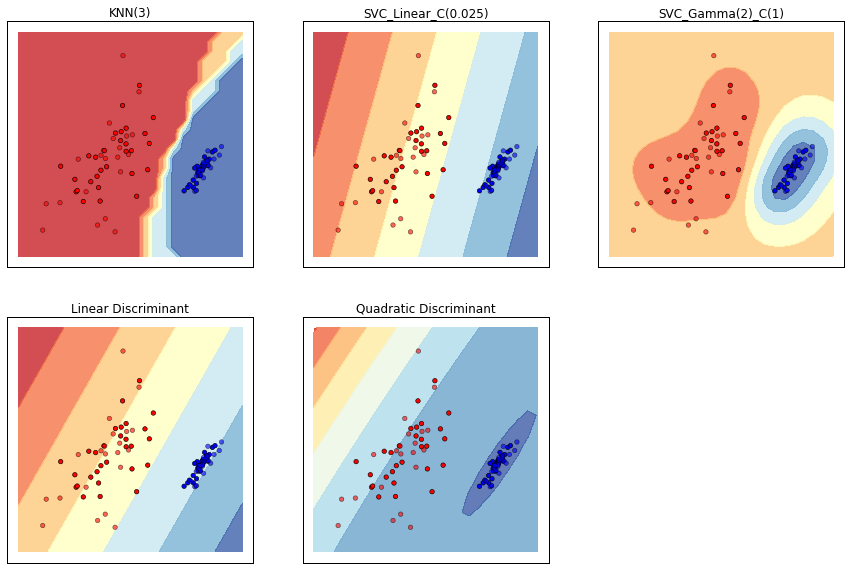

In [28]:
linear_separable = Linear_Separable_Data()

clfs = [KNeighborsClassifier(3), 
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis()]

names = ['KNN(3)', 'SVC_Linear_C(0.025)', 'SVC_Gamma(2)_C(1)', 'Linear Discriminant', 'Quadratic Discriminant']

plt.figure(figsize=(15, 15))

for index, clf in enumerate(clfs):
    ax = plt.subplot(3, 3, index + 1)
    linear_separable.plot(ax, clf)
    name = names[index]
    ax.set_title(name)